<a href="https://colab.research.google.com/github/Shaikmd3797/DIABETES-PREDICTION/blob/main/Copy_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) DATA CLEANING

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diabetes.csv') # read the datasets
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 1)delete duplicates
print(df.shape)
df=df.drop_duplicates()
df.shape

(768, 9)


(768, 9)

NO DUPLICATES ARE IN DATASETS

In [4]:
# 2) CHECK THE DATA STRUCTURE
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


DATAS ARE STORE IN CORRECT FORMATE

In [5]:
#3)TREATING NULL VALUES
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df=df.replace(0,np.NaN)

In [8]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
def treat_null(df,column):
  df[column].fillna(df[column].mean(),inplace=True)
def treat_null_cat(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [10]:
for i in ['BMI']:
  treat_null(df,i)
for j in ['Glucose','BloodPressure','SkinThickness','Insulin']:
  treat_null_cat(df,j)

In [11]:
df['Pregnancies'].fillna(0,inplace=True)
df['Outcome'].fillna(0,inplace=True)
df['Insulin'].fillna(0,inplace=True)

In [12]:
#df=df.drop('Insulin', axis=1)

NO NULL VALUES ARE IN DATASETS

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
def outliers_check(df,col):
  q1=df[col].quantile(0.25)  # 25 th quantile
  q3=df[col].quantile(0.75)  # 75 th quantile
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  df[col]=df[col].clip(lower,upper)
  return (df[col])

In [16]:
#df['Insulin']=outliers_check(df,"Insulin")

4)TREATING OUTLIERS
THIS IS MEDICAL FIELD DATAS. OUTLIERS ARE IMPORTANT IN THIS DATASETS

2) FEATURE ENGINEERING

In [17]:
def fat(df):
  if df>25:
    return 1
  else:
    return 0
df['fat']=[fat(i) for i in df['BMI']]
def excess_Glucose(df):
  if df>100:
    return 1
  else:
    return 0
df['excess_glocose']=[excess_Glucose(i) for i in df['Glucose']]
def lowBP(df):
  if df<80:
    return 1
  else:
    return 0
df['lowBp']=[lowBP(i) for i in df['BloodPressure']]
def excess_insulin(df):
  if df>300:
    return 1
  else:
    return 0
df['high_insulin']=[excess_insulin(i) for i in df['Insulin']]

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fat,excess_glocose,lowBp,high_insulin
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1.0,1,1,1,0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0.0,1,0,1,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1.0,0,1,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,1,0,1,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0,1,1,1,0


3)EDA

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def EDA(df,num_features,cat_features,outcome):
  for i in num_features:
    plt.figure(figsize=(15,10))
    sns.histplot(x=i,data=df,hue=outcome,bins=10,kde=True,multiple='stack')
    plt.show()
  sns.pairplot(df,hue=outcome)
  for j in cat_features:
    df.groupby(j)[outcome].mean().sort_values().plot(kind='barh')
    plt.show()

  plt.figure(figsize=(15, 10))
  sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)
  plt.show()


In [21]:
num_features=['Glucose','BloodPressure','SkinThickness','BMI','Insulin','DiabetesPedigreeFunction','Age']
cat_features=['fat','Pregnancies','excess_glocose','lowBp','high_insulin']

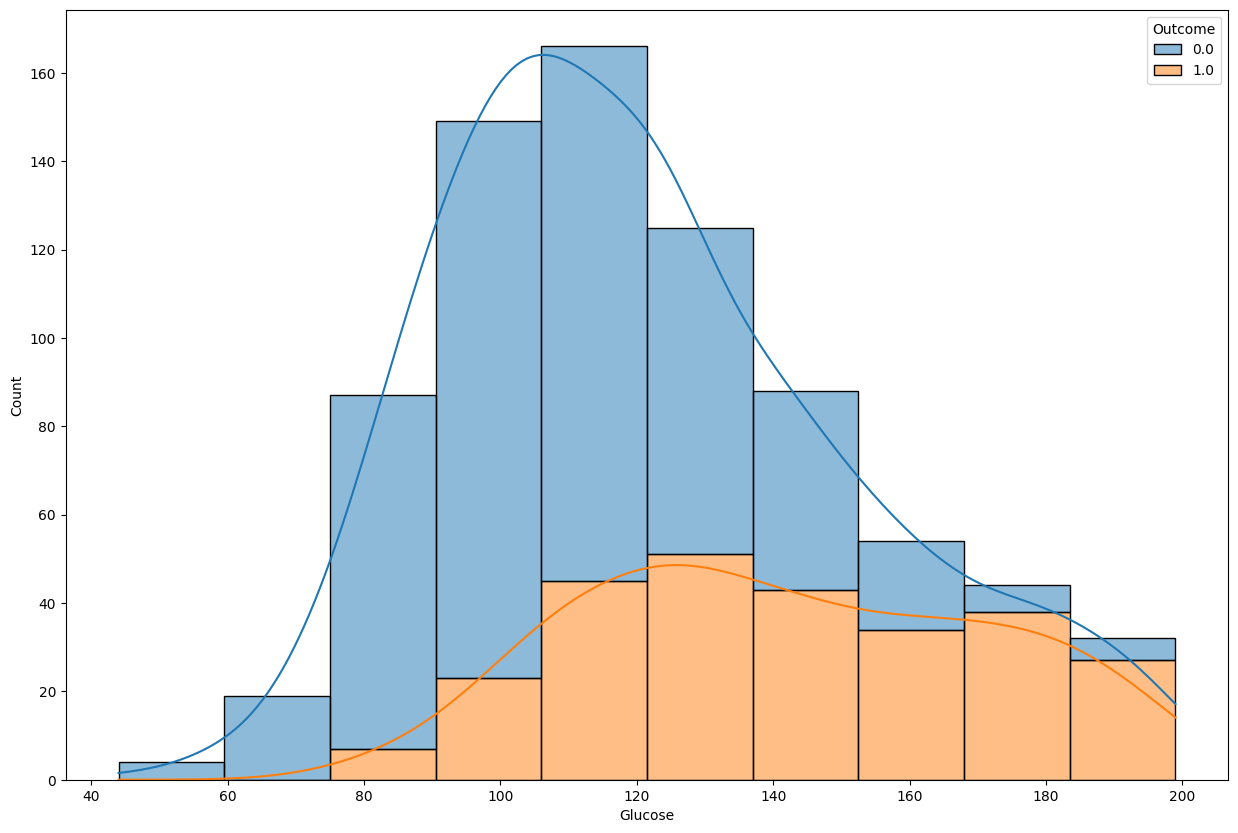

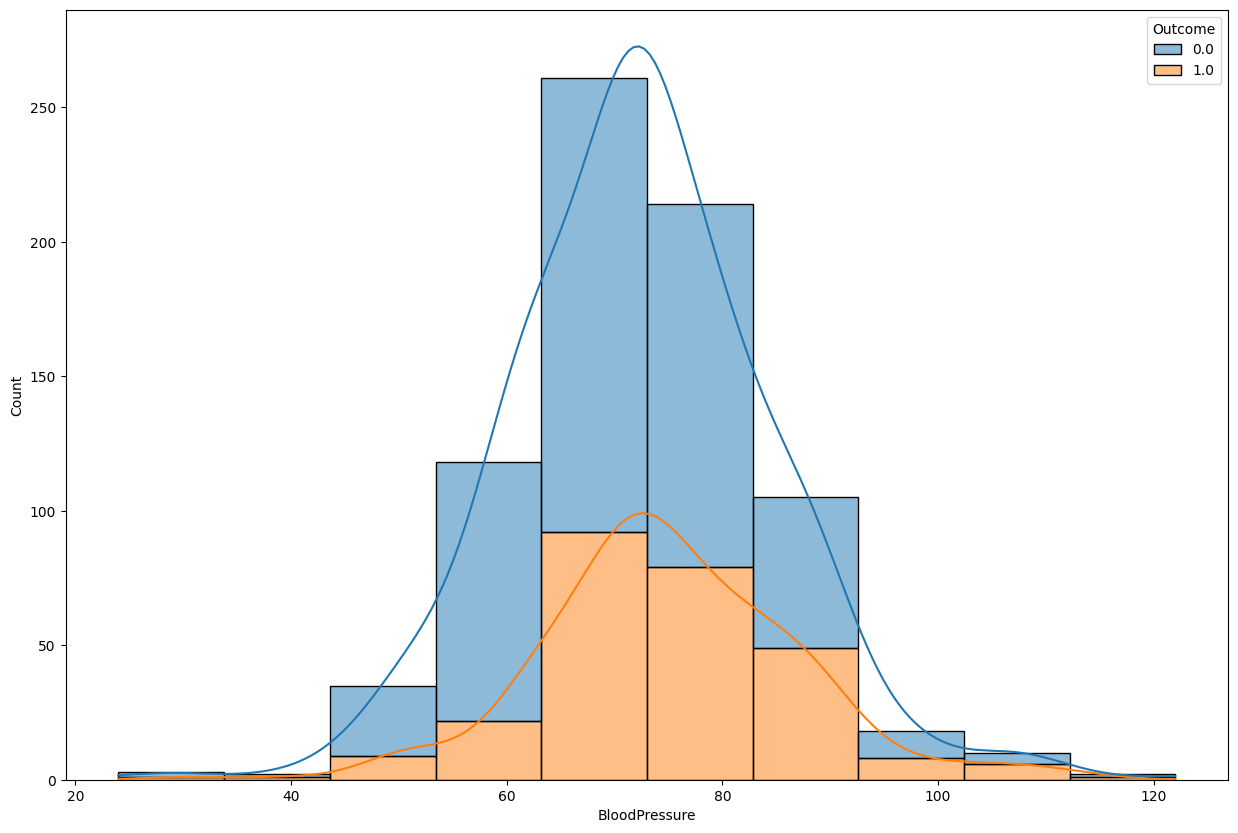

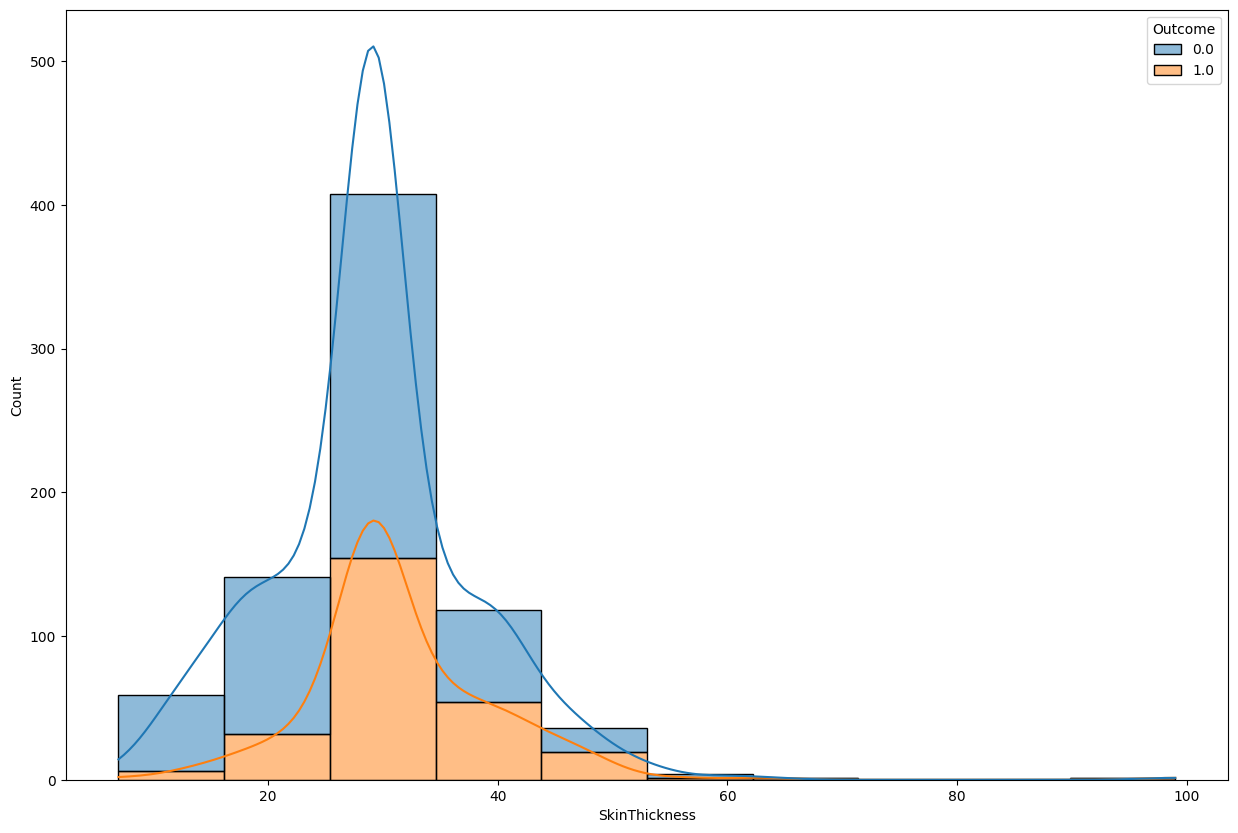

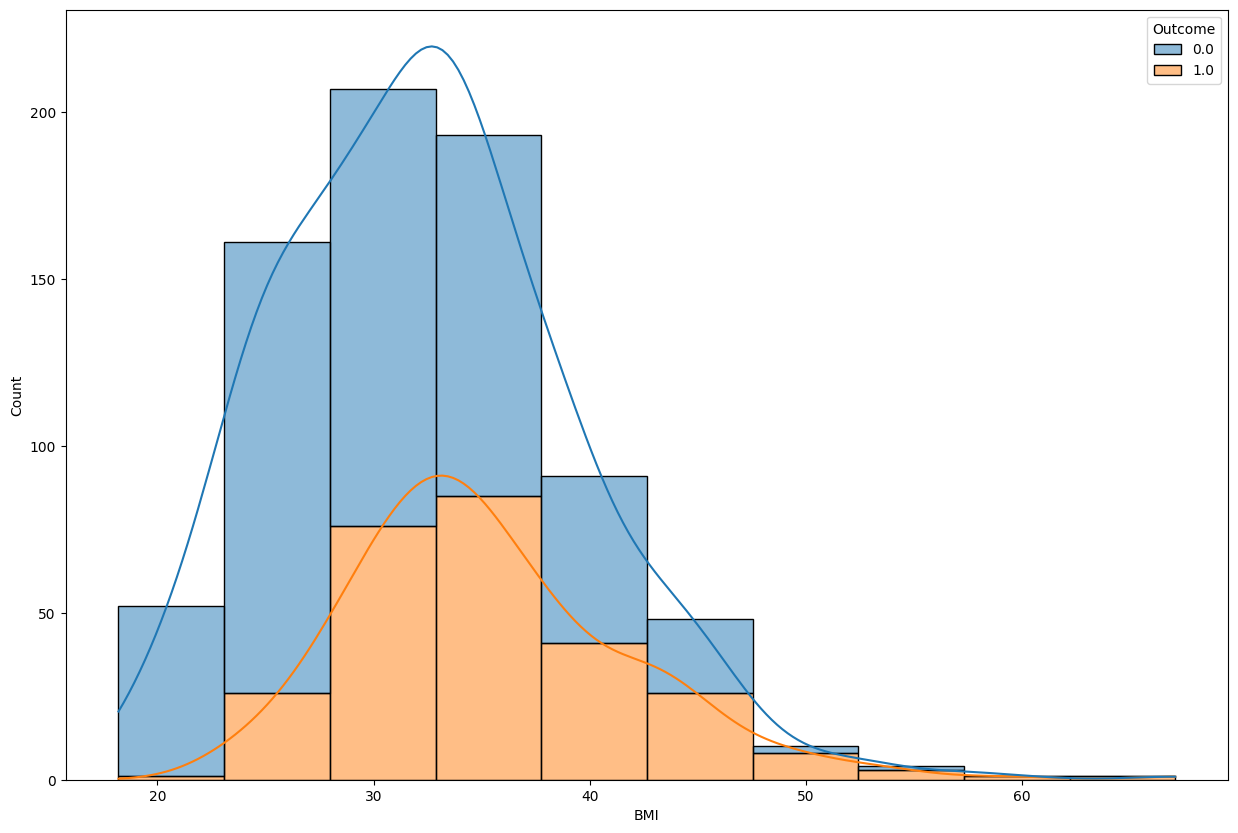

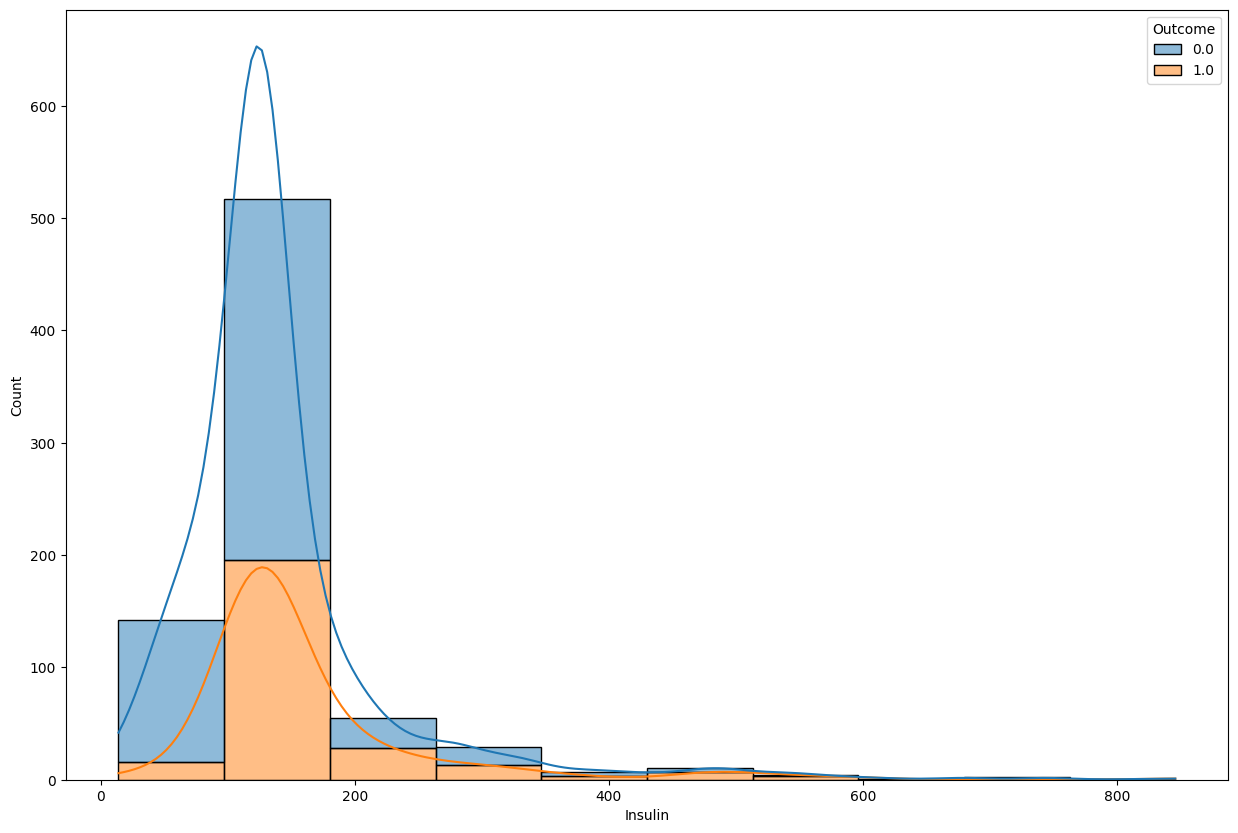

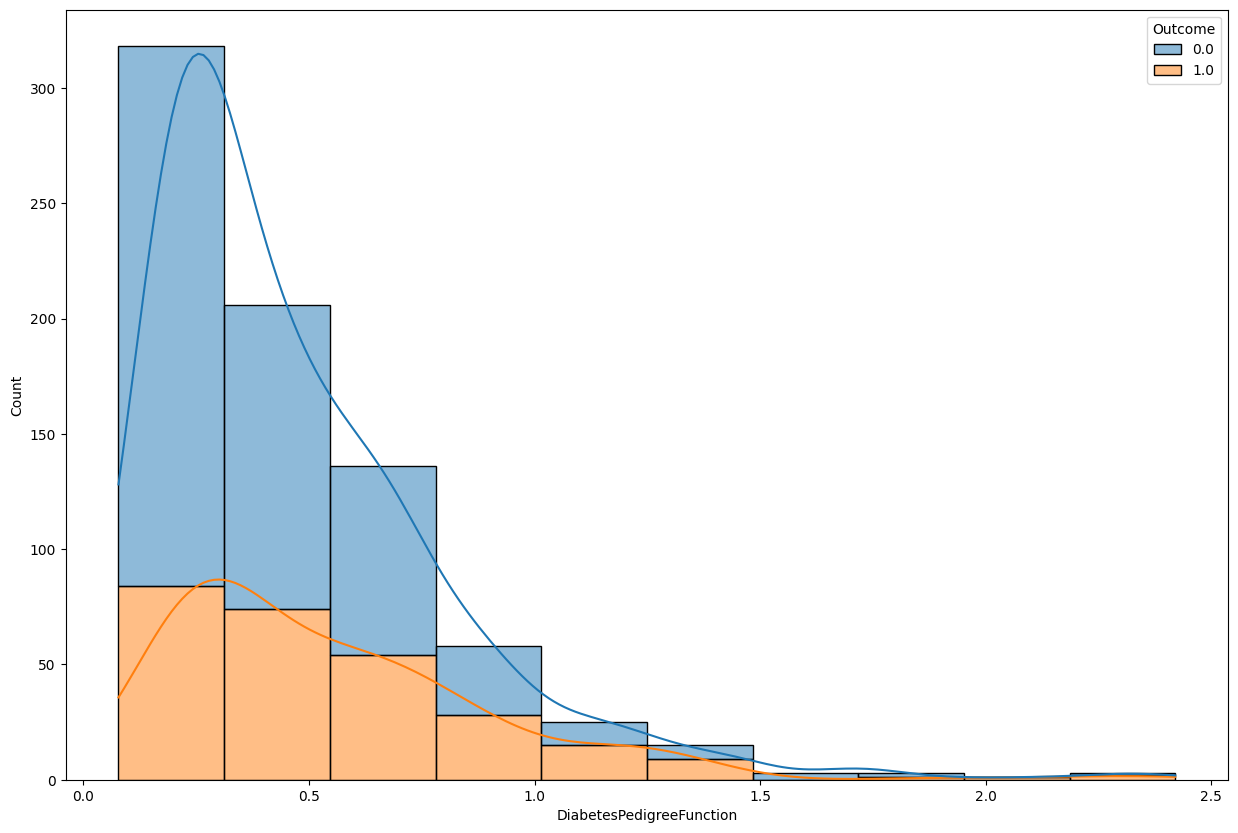

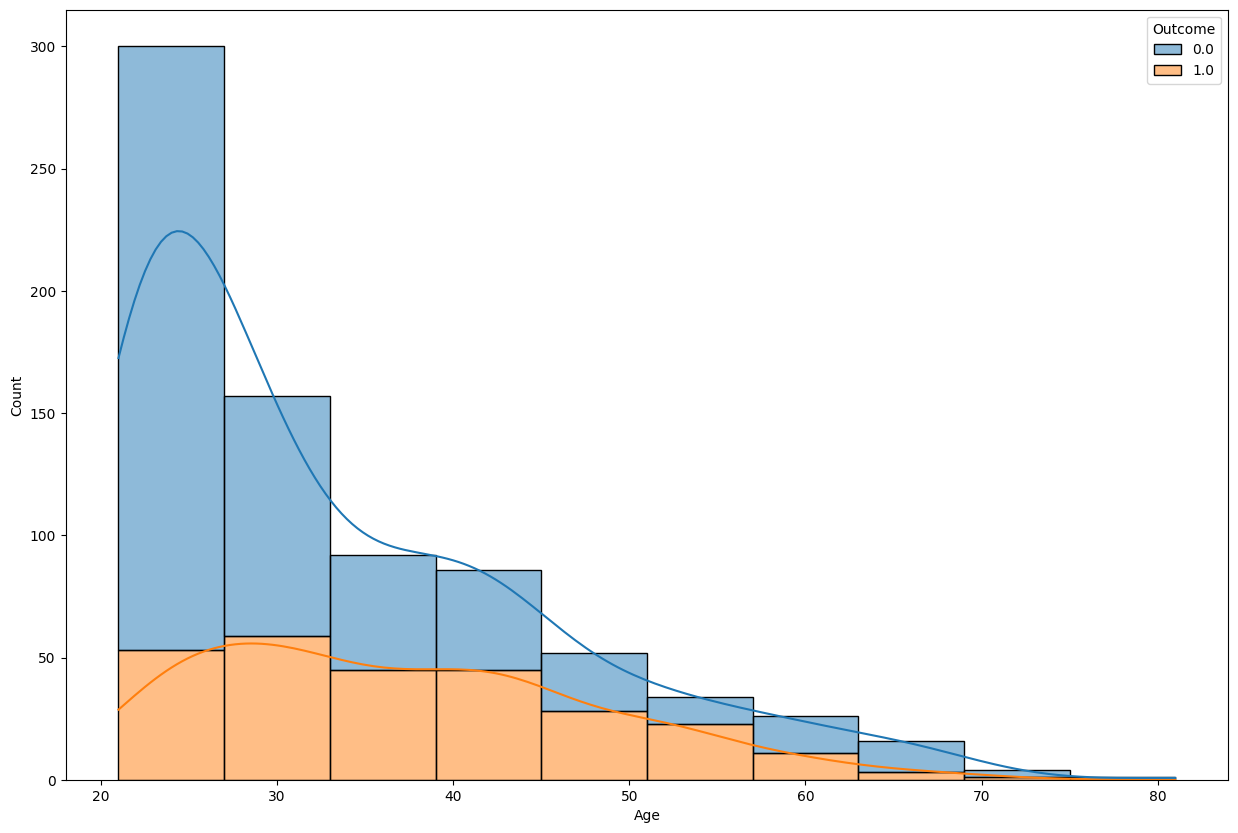

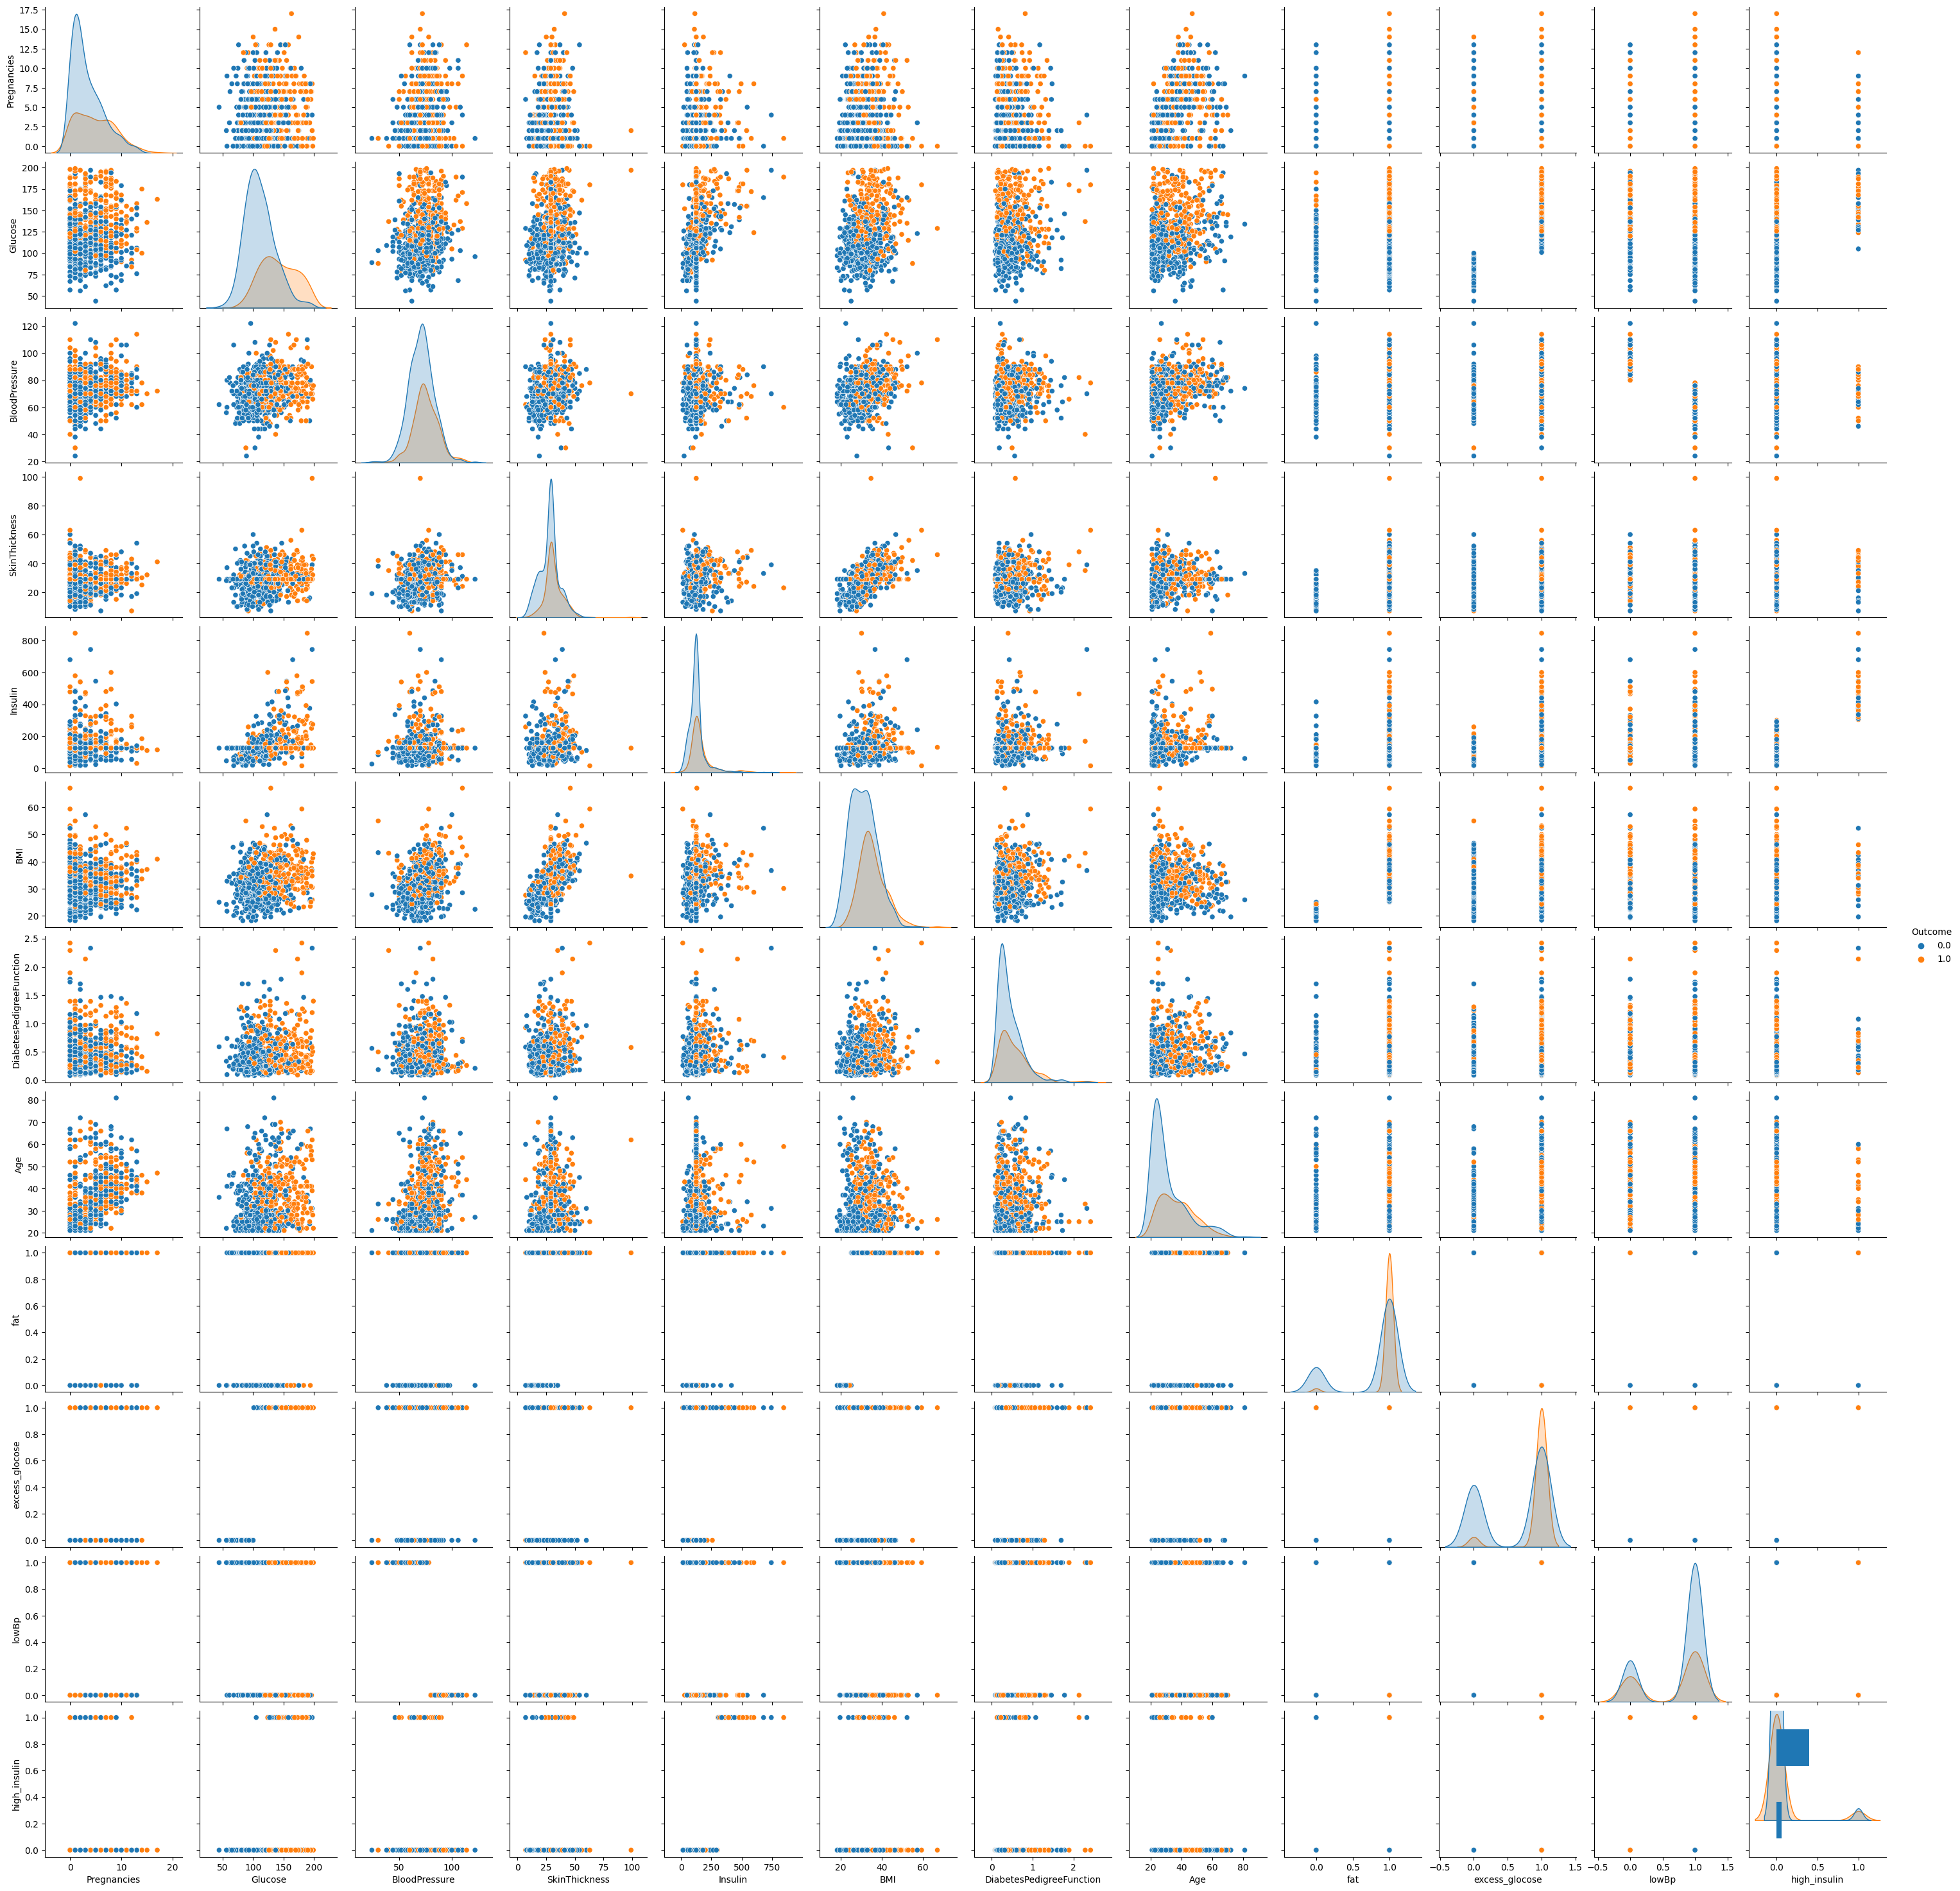

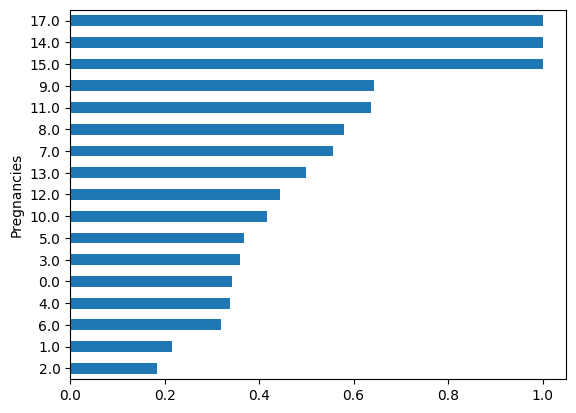

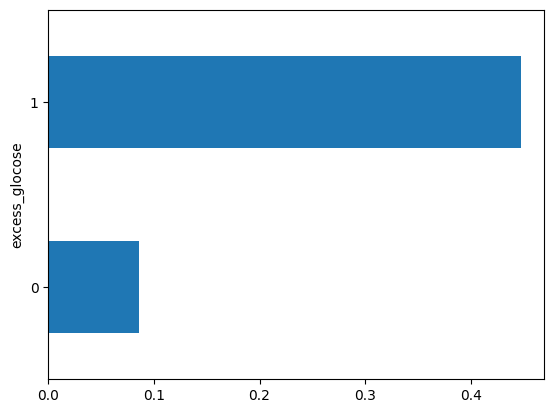

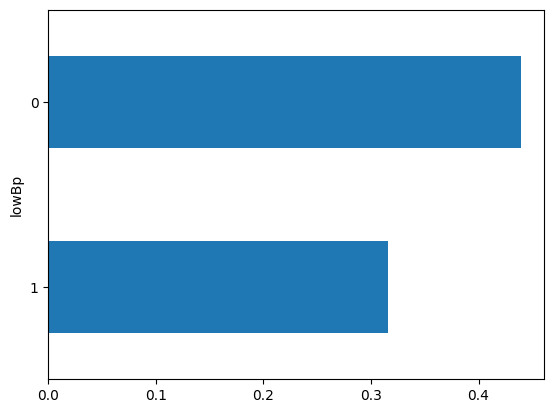

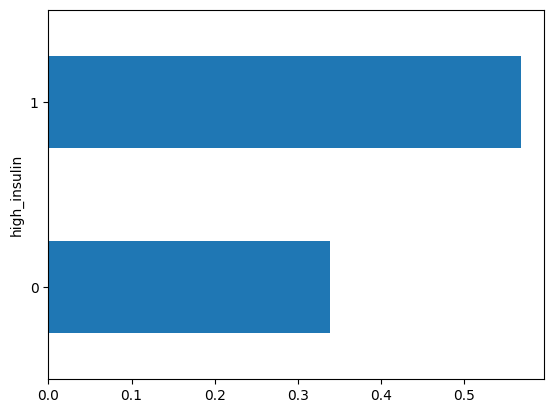

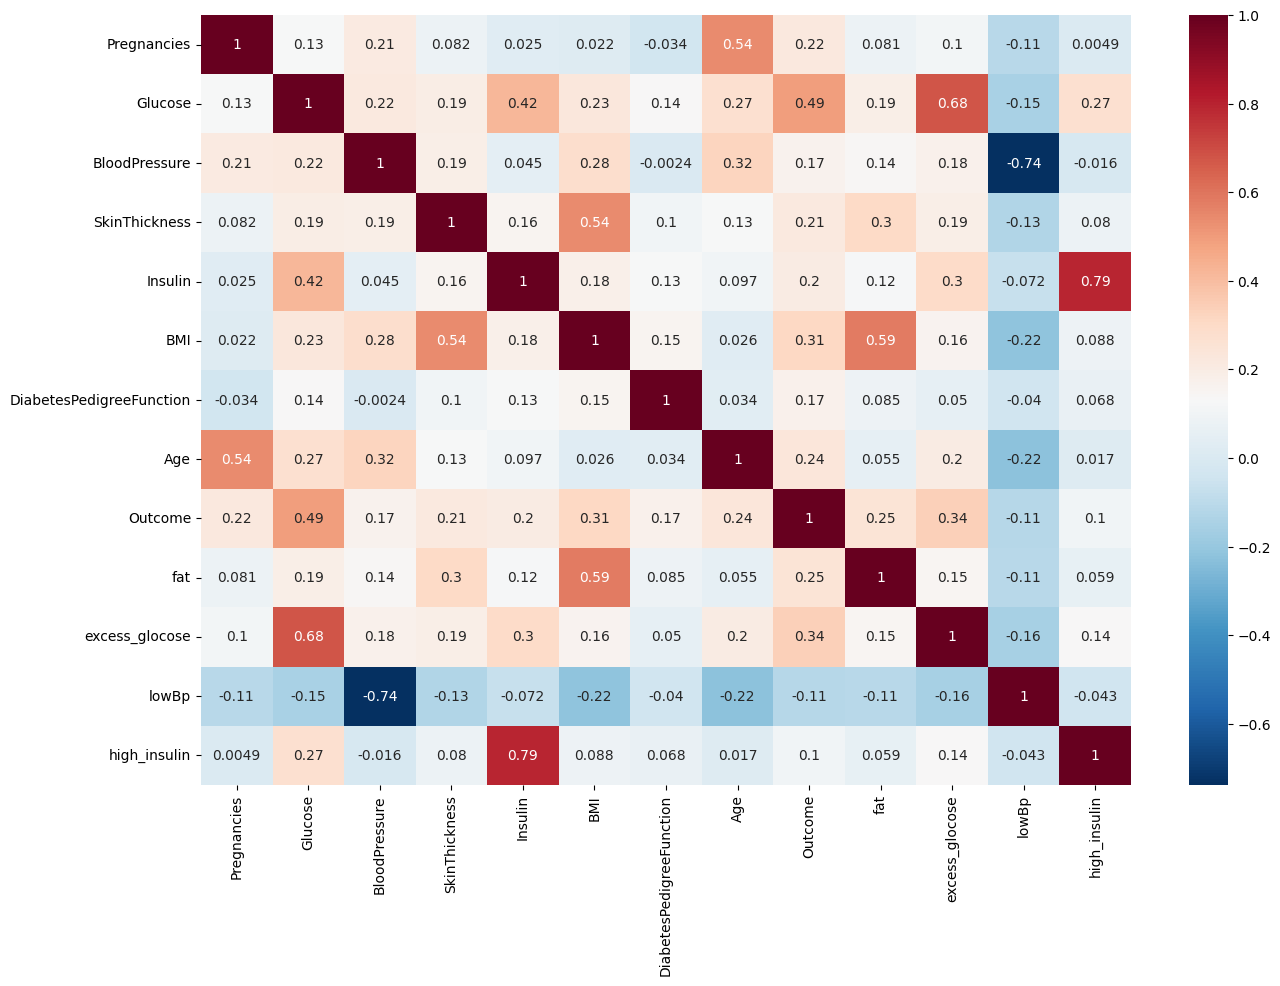

In [22]:
EDA(df,num_features,cat_features,'Outcome')

4) CHECK BALANCING THE DATASETS

In [23]:
def check(df,outcome):
  count_data=pd.DataFrame(df[outcome].value_counts()).reset_index()
  count_data.columns=[outcome,'count']
  count_data['percentage']=(count_data['count']/sum(count_data['count']))*100
  count_data.columns=[outcome,'count','percentage']
  return count_data

In [24]:
check(df,'Outcome')

,Outcome,count,percentage
0,0.0,500,65.104167
1,1.0,268,34.895833


5)SPLITTING THE DATASET

In [25]:
X=df.drop('Outcome',axis=1)

In [26]:
y=df['Outcome']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15,stratify=y)

In [28]:
X_train.shape

(576, 12)

In [29]:
y_train.shape

(576,)

In [30]:
def balancing (x,y):
  from imblearn.combine import SMOTEENN
  from imblearn.under_sampling import RandomUnderSampler
  SM=SMOTEENN(random_state=37)
  X_SM,y_SM=SM.fit_resample(x,y)
  return X_SM,y_SM

In [31]:
!pip install imblearn
import imblearn

In [32]:
X_train,y_train=balancing(X_train,y_train)

In [33]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [34]:
X_train.shape

(391, 12)

In [35]:
y_train.shape

(391,)

6)SCALING OF DATAS

In [36]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)

7)BUILD THE MODEL

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,roc_auc_score

In [38]:
def MODEL (model,X_train, X_test, y_train, y_test,k):
  mod=model
  mod=mod.fit(X_train, y_train)
  y_predict_mod=mod.predict(X_test)
  y_pred_train=mod.predict(X_train)
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod})
  score=mod.score(X_test,y_test)
  print('for ' ,k ,' value ',"Train Accuracy : ",round(roc_auc_score(y_train,y_pred_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(mod, X_train, y_train, cv=10,scoring='roc_auc')),3))
  return y_predict_mod,result,score,mod

In [39]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
y_predict_log,result_L,score_L,log=MODEL(LogisticRegression(random_state=15),X_train_scale, X_test_scale, y_train, y_test,1)

for  1  value  Train Accuracy :  0.95 Val Accuracy :  0.972


In [40]:
# KNN CLAASIFIER MODEL
from sklearn.neighbors import KNeighborsClassifier
for i in range (10,30,2):
  MODEL(KNeighborsClassifier(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.941 Val Accuracy :  0.969
for  12  value  Train Accuracy :  0.933 Val Accuracy :  0.971
for  14  value  Train Accuracy :  0.933 Val Accuracy :  0.975
for  16  value  Train Accuracy :  0.936 Val Accuracy :  0.974
for  18  value  Train Accuracy :  0.935 Val Accuracy :  0.972
for  20  value  Train Accuracy :  0.926 Val Accuracy :  0.971
for  22  value  Train Accuracy :  0.92 Val Accuracy :  0.974
for  24  value  Train Accuracy :  0.92 Val Accuracy :  0.974
for  26  value  Train Accuracy :  0.914 Val Accuracy :  0.974
for  28  value  Train Accuracy :  0.914 Val Accuracy :  0.973


In [41]:
y_predict_knn,result_K,score_K,knn=MODEL(KNeighborsClassifier(6),X_train_scale, X_test_scale, y_train, y_test,6)

for  6  value  Train Accuracy :  0.949 Val Accuracy :  0.97


In [42]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
for i in range(1,10):
  MODEL(DecisionTreeClassifier(max_depth=i,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)


for  1  value  Train Accuracy :  0.88 Val Accuracy :  0.88
for  2  value  Train Accuracy :  0.897 Val Accuracy :  0.935
for  3  value  Train Accuracy :  0.965 Val Accuracy :  0.948
for  4  value  Train Accuracy :  0.984 Val Accuracy :  0.964
for  5  value  Train Accuracy :  0.997 Val Accuracy :  0.949
for  6  value  Train Accuracy :  0.997 Val Accuracy :  0.942
for  7  value  Train Accuracy :  1.0 Val Accuracy :  0.94
for  8  value  Train Accuracy :  1.0 Val Accuracy :  0.94
for  9  value  Train Accuracy :  1.0 Val Accuracy :  0.94


In [43]:
y_predict_dt,result_D,score_D,dt=MODEL(DecisionTreeClassifier(max_depth=5,random_state=15),X_train_scale, X_test_scale, y_train, y_test,5)

for  5  value  Train Accuracy :  0.997 Val Accuracy :  0.949


In [44]:
# XGBOOST CLASSIFIER
import xgboost as xgb
for i in np.arange(0.1,1.1,0.1):
  MODEL(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.2  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.30000000000000004  value  Train Accuracy :  1.0 Val Accuracy :  0.988
for  0.4  value  Train Accuracy :  1.0 Val Accuracy :  0.988
for  0.5  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.6  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.7000000000000001  value  Train Accuracy :  1.0 Val Accuracy :  0.987
for  0.8  value  Train Accuracy :  1.0 Val Accuracy :  0.988
for  0.9  value  Train Accuracy :  1.0 Val Accuracy :  0.986
for  1.0  value  Train Accuracy :  1.0 Val Accuracy :  0.988


In [45]:
for i in np.arange(0.15,0.25,0.01):
  MODEL(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.15  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.16  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.17  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.18000000000000002  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.19000000000000003  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.20000000000000004  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.21000000000000005  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.22000000000000006  value  Train Accuracy :  1.0 Val Accuracy :  0.988
for  0.23000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.24000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.989


In [46]:
y_predict_Xgb,result_X,score_X,Xgb=MODEL(xgb.XGBClassifier(learning_rate=0.2,n_estimators= 100,random_state=37),X_train_scale, X_test_scale, y_train, y_test,0.2)

for  0.2  value  Train Accuracy :  1.0 Val Accuracy :  0.989


In [47]:
# RANDOM FOREST CLAASIFIER
from sklearn.ensemble import RandomForestClassifier
for i in [5,10,20,30,40,50,60,70,80,90,100]:
  MODEL(RandomForestClassifier(n_estimators=i,random_state=15,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  5  value  Train Accuracy :  0.995 Val Accuracy :  0.979
for  10  value  Train Accuracy :  1.0 Val Accuracy :  0.988
for  20  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  30  value  Train Accuracy :  1.0 Val Accuracy :  0.991
for  40  value  Train Accuracy :  1.0 Val Accuracy :  0.992
for  50  value  Train Accuracy :  1.0 Val Accuracy :  0.993
for  60  value  Train Accuracy :  1.0 Val Accuracy :  0.993
for  70  value  Train Accuracy :  1.0 Val Accuracy :  0.993
for  80  value  Train Accuracy :  1.0 Val Accuracy :  0.993
for  90  value  Train Accuracy :  1.0 Val Accuracy :  0.993
for  100  value  Train Accuracy :  1.0 Val Accuracy :  0.994


In [48]:
y_predict_rfc,result_R,score_R,rfc=MODEL(RandomForestClassifier(n_estimators=100,random_state=15,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,100)

for  100  value  Train Accuracy :  1.0 Val Accuracy :  0.994


8)EVALUATION METRICS

In [49]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,roc_auc_score,roc_curve,RocCurveDisplay

In [50]:
def evaluate(mod,X_test,y_test,y_predict):
  f1=f1_score(y_test,y_predict)
  roc=roc_auc_score(y_test,y_predict)
  #fpr,tpr,_=roc_curve(y_test,y_predict)
  #plt.plot(fpr,tpr)
  #a=RocCurveDisplay.from_predictions(fpr=fpr,tpr=tpr)
  #a.plot()
  #plt.show()
  print('AUROC  score of ',mod,': ', roc)
  print('F1 score of ',mod, ':',f1)

In [51]:
evaluate(log,X_test,y_test,y_predict_log)

AUROC  score of  LogisticRegression(random_state=15) :  0.7579104477611939
F1 score of  LogisticRegression(random_state=15) : 0.6871165644171779


In [52]:
evaluate(knn,X_test,y_test,y_predict_knn)

AUROC  score of  KNeighborsClassifier(n_neighbors=6) :  0.753910447761194
F1 score of  KNeighborsClassifier(n_neighbors=6) : 0.6829268292682926


In [53]:
evaluate(dt,X_test,y_test,y_predict_dt)

AUROC  score of  DecisionTreeClassifier(max_depth=5, random_state=15) :  0.736597014925373
F1 score of  DecisionTreeClassifier(max_depth=5, random_state=15) : 0.6623376623376623


In [54]:
evaluate(xgb,X_test,y_test,y_predict_Xgb)

AUROC  score of  <module 'xgboost' from '/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py'> :  0.7795223880597014
F1 score of  <module 'xgboost' from '/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py'> : 0.7114093959731543


In [55]:
evaluate(rfc,X_test,y_test,y_predict_rfc)

AUROC  score of  RandomForestClassifier(random_state=15) :  0.7909850746268657
F1 score of  RandomForestClassifier(random_state=15) : 0.7248322147651006


***conclusion***

1) Random forest classifier model gives high roc score compared to other models.

2) according to heat map diabetes is highly depends on glucose level.

3)age and BMI are affect to result next to glucose.

4)skin thickness are not depends very much on daibetes.

5) diabetes mostly affected in between the age group of 40 to 60.
